<a href="https://colab.research.google.com/github/Mahin-Ahmed98/Mahin-Ahmed-23526107/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existin

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: c1c054ccd63647b3a566d700d40cbdf1.BUyucS8_gq5c16SfRI-Tey2F


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
!pip install pyinputplus
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=957c3fe21c7148e522c5b5d86f6708d6993830e0df927d231dbd088b4b674c3c
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=0880f4c031e489b4573a659c338046400df73a2cfd9b758fda3ee0737e6ae9bc
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

## 🌤️ Weather Data Functions

In [23]:
import requests

def get_weather_data(location, forecast_days=5):

    if not (1 <= forecast_days <= 5):
        raise ValueError("forecast_days must be between 1 and 5")

    try:
        # wttr.in JSON endpoint — 'format=j1' returns structured weather data
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        # Extract current condition
        current = data["current_condition"][0]

        # Extract forecast for specified days
        forecast = data["weather"][:forecast_days]

        # Build a clean, simple dictionary
        return {
            "location": location,
            "current": {
                "temperature_C": current["temp_C"],
                "humidity": current["humidity"],
                "description": current["weatherDesc"][0]["value"]
            },
            "forecast": [
                {
                    "date": day["date"],
                    "min_temp_C": day["mintempC"],
                    "max_temp_C": day["maxtempC"],
                    "description": day["hourly"][4]["weatherDesc"][0]["value"]  # ~midday forecast
                }
                for day in forecast
            ]
        }

    except Exception as e:
        print(f"Error retrieving weather data: {e}")
        return None


## 📊 Visualisation Functions

In [35]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    dates = [day['date'] for day in weather_data['forecast']]
    min_temps = [float(day['min_temp_C']) for day in weather_data['forecast']]
    max_temps = [float(day['max_temp_C']) for day in weather_data['forecast']]

    plt.figure()
    plt.plot(dates, min_temps, marker='o', label='Min Temp (°C)')
    plt.plot(dates, max_temps, marker='o', label='Max Temp (°C)')
    plt.title(f"Temperature Forecast for {weather_data['location']}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)

    if output_type == 'figure':
        return plt.gcf()
    else:
        plt.show()


In [36]:


def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = [day['date'] for day in weather_data['forecast']]
    # wttr.in often includes precip data under 'hourly', so we’ll just use dummy 0s if missing
    precip = [float(day.get('precipMM', 0)) for day in weather_data['forecast']]

    plt.figure()
    plt.bar(dates, precip)
    plt.title(f"Daily Precipitation for {weather_data['location']}")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.grid(True)

    if output_type == 'figure':
        return plt.gcf()
    else:
        plt.show()


## 🤖 Natural Language Processing

In [29]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):

    q = question.strip()
    ql = q.lower()

    # attribute
    if "rain" in ql:
        attribute = "rain"
    elif "temp" in ql or "temperature" in ql or "hot" in ql or "cold" in ql:
        attribute = "temperature"
    elif "humidity" in ql:
        attribute = "humidity"
    elif "wind" in ql or "windy" in ql:
        attribute = "wind"
    else:
        attribute = "summary"

    # time
    days_ahead = 0
    range_days = None
    if "tomorrow" in ql:
        days_ahead = 1
    elif "day after" in ql:
        days_ahead = 2
    # "in N days"
    if "in " in ql and " day" in ql:
        try:
            part = ql.split("in ", 1)[1]
            num = int(part.split(" day", 1)[0].strip().split()[0])
            days_ahead = num
        except Exception:
            pass
    # "next N days"
    if "next " in ql and " day" in ql:
        try:
            part = ql.split("next ", 1)[1]
            num = int(part.split(" day", 1)[0].strip().split()[0])
            range_days = num
            # start from today unless they said tomorrow
            if "tomorrow" in ql:
                days_ahead = 1
            else:
                days_ahead = 0
        except Exception:
            pass

    # location (very basic: take text after " in/at/for/near ")
    location = None
    for kw in [" in ", " at ", " for ", " near "]:
        if kw in q:
            location = q.split(kw, 1)[1].strip(" ?.,")
            break

    return {
        "attribute": attribute,
        "days_ahead": days_ahead,
        "range_days": range_days,
        "location": location
    }


## 🧭 User Interface

Ask about the weather: temperature
Enter a location: perth


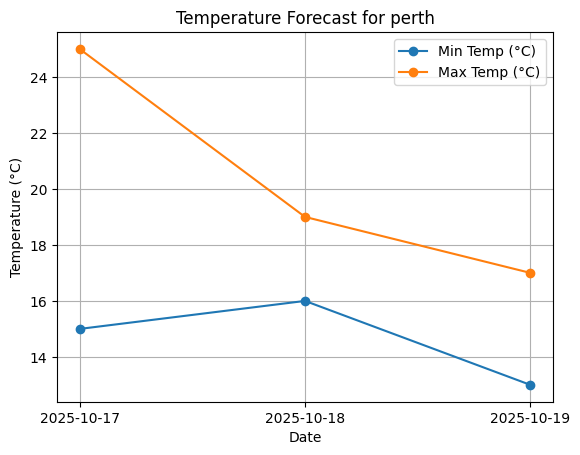

perth on 2025-10-17: min 15°C, max 25°C.


In [47]:
# Define menu functions using pyinputplus or ipywidgets here
def main():
    # Ask user for a weather question
    question = input("Ask about the weather: ")

    # Parse the question
    parsed = parse_weather_question(question)

    # If user didn’t mention location, ask
    if not parsed.get('location'):
        parsed['location'] = input("Enter a location: ")

    # Get weather data from wttr.in
    weather_data = get_weather_data(parsed['location'], 5)

    # Generate and show the weather answer
    answer = generate_weather_response(weather_data, parsed)
    print(answer)
if __name__ == "__main__":
    main()


## 🧩 Main Application Logic

In [46]:
def generate_weather_response(weather_data, parsed, show_graph=True):
    attr = parsed.get("attribute", "summary")
    day_index = int(parsed.get("days_ahead", 0))
    loc = parsed.get("location") or weather_data.get("location", "the location")

    forecast = weather_data.get("forecast", [])
    if not forecast:
        return "No forecast data available."

    if day_index < 0 or day_index >= len(forecast):
        day_index = 0  # default to today

    day = forecast[day_index]
    date = day.get("date", "")

    # --- temperature ---
    if attr == "temperature":
        if show_graph:
            create_temperature_visualisation(weather_data)
        return f"{loc} on {date}: min {day.get('min_temp_C')}°C, max {day.get('max_temp_C')}°C."

    # --- rain ---
    elif attr == "rain":
        if show_graph:
            create_precipitation_visualisation(weather_data)
        p = day.get("precipMM", "0")
        try:
            p = float(p)
        except:
            p = 0.0
        return f"{loc} on {date}: precipitation ~{p:.1f} mm."

    # --- humidity ---
    elif attr == "humidity":
        h = weather_data.get("current", {}).get("humidity")
        return f"Humidity in {loc} now: {h}%." if h else f"Humidity for {loc} on {date} not available."

    # --- wind ---
    elif attr == "wind":
        w = weather_data.get("current", {}).get("windspeedKmph")
        return f"Current wind in {loc}: {w} km/h." if w else f"Wind data for {loc} not available."

    # --- summary (default) ---
    else:
        desc = day.get("description", "")
        return f"{loc} on {date}: {desc}. {day.get('min_temp_C')}°C–{day.get('max_temp_C')}°C."


## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.